In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd

In [4]:
import celloracle as co

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
base_GRN = co.data.load_mouse_scATAC_atlas_base_GRN()
base_GRN

,peak_id,gene_short_name,9430076c15rik,Ac002126.6,Ac012531.1,Ac226150.2,Afp,Ahr,Ahrr,Aire,...,Znf784,Znf8,Znf816,Znf85,Zscan10,Zscan16,Zscan22,Zscan26,Zscan31,Zscan4
0,chr10_100050979_100052296,4930430F08Rik,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chr10_101006922_101007748,SNORA17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,chr10_101144061_101145000,Mgat4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,chr10_10148873_10149183,9130014G24Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chr10_10149425_10149815,9130014G24Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91971,chrX_99839037_99840900,Phka1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
91972,chrY_345823_347369,Eif2s3y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91973,chrY_581272_582790,Uty,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91974,chrY_621772_623366,Ddx3y,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
import anndata
adata = anndata.read_h5ad('../data/slideseq/day3_2.h5ad')
adata.layers["raw_count"] = adata.X
adata

AnnData object with n_obs × n_vars = 13744 × 25343
    obs: 'cluster', 'rctd_cluster'
    obsm: 'X_spatial', 'rctd_results', 'spatial'
    layers: 'raw_count'

In [70]:
n_top_genes = 3000 
min_cells = 10 #Minimum number of cells expressed required for a gene to pass filtering.
min_counts = 300 #Minimum number of counts required for a cell to pass filtering.
gene_min_counts = None #Minimum number of counts required for a gene to pass filtering.

adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)
sc.pp.filter_cells(adata, min_counts=min_counts)
adata = adata[adata.obs["pct_counts_mt"] < 20].copy()
adata = adata[:, ~adata.var["mt"]]
sc.pp.filter_genes(adata, min_cells=min_cells, min_counts=gene_min_counts)

sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(
    adata, flavor="seurat", n_top_genes=n_top_genes)

adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 12006 × 3000
    obs: 'cluster', 'rctd_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_spatial', 'rctd_results', 'spatial'
    layers: 'raw_count'

In [71]:
'Pax5' in adata.var_names

True

In [72]:
%%time

sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=20)
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X_diffmap')

CPU times: user 5.58 s, sys: 2.35 s, total: 7.93 s
Wall time: 5.1 s


In [73]:
sc.tl.paga(adata, groups='rctd_cluster')

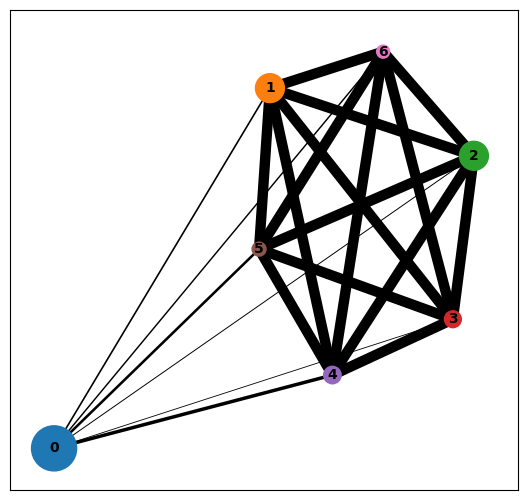

In [74]:
plt.rcParams["figure.figsize"] = [6, 6]
sc.pl.paga(adata)

In [75]:
sc.tl.draw_graph(adata, init_pos='paga', random_state=123)

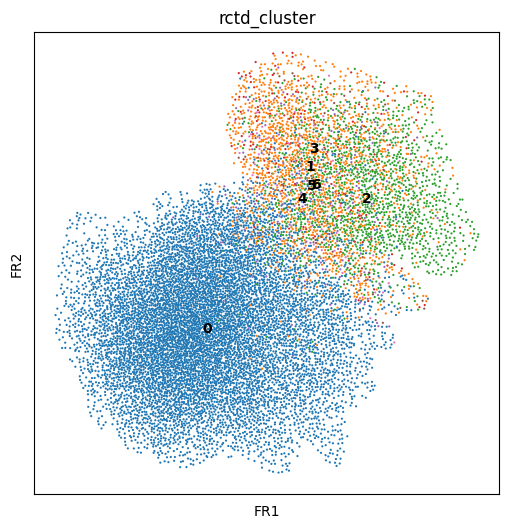

In [76]:
%matplotlib inline
sc.pl.draw_graph(adata, color='rctd_cluster', legend_loc='on data')

In [77]:
oracle = co.Oracle()

In [78]:
adata.layers["raw_count"].toarray().sum(0)

array([835.,  17.,  34., ...,  75., 508., 553.], dtype=float32)

In [79]:
adata.X = adata.layers["raw_count"].copy()

oracle.import_anndata_as_raw_count(
    adata=adata,
    cluster_column_name="rctd_cluster",
    embedding_name="X_draw_graph_fr"
)

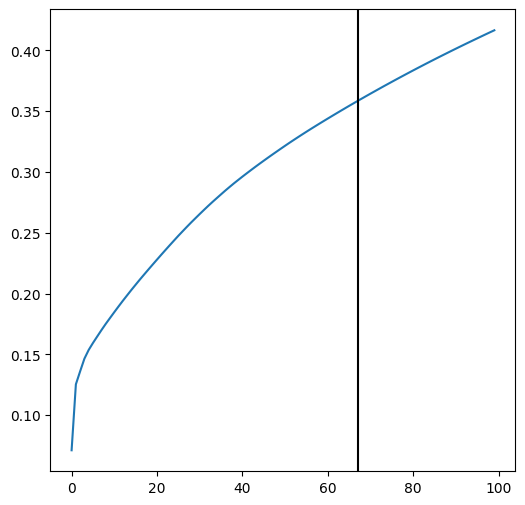

67


In [80]:
%matplotlib inline

# Perform PCA
oracle.perform_PCA()

# Select important PCs
plt.plot(np.cumsum(oracle.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(oracle.pca.explained_variance_ratio_))>0.002))[0][0]
plt.axvline(n_comps, c="k")
plt.show()
print(n_comps)
n_comps = min(n_comps, 50)

In [81]:
n_cell = oracle.adata.shape[0]
print(f"cell number is :{n_cell}")

cell number is :12006


In [82]:
k = int(0.025*n_cell)
print(f"Auto-selected k is :{k}")

Auto-selected k is :300


In [83]:
oracle.knn_imputation(
    n_pca_dims=n_comps, 
    k=k, 
    balanced=True, 
    b_sight=k*8,
    b_maxl=k*4, 
    n_jobs=4
)

In [84]:
base_GRN = co.data.load_mouse_scATAC_atlas_base_GRN()
oracle.import_TF_data(TF_info_matrix=base_GRN)

In [85]:
%%time

links = oracle.get_links(
    cluster_name_for_GRN_unit="rctd_cluster", 
    alpha=10,
    verbose_level=10
)

  0%|          | 0/7 [00:00<?, ?it/s]

Inferring GRN for 0...


  0%|          | 0/2327 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [05:33<33:22, 333.68s/it]

Inferring GRN for 1...


  0%|          | 0/2327 [00:00<?, ?it/s]

 29%|██▊       | 2/7 [08:23<19:47, 237.45s/it]

Inferring GRN for 2...


  0%|          | 0/2327 [00:00<?, ?it/s]

 43%|████▎     | 3/7 [11:16<13:51, 207.95s/it]

Inferring GRN for 3...


  0%|          | 0/2327 [00:00<?, ?it/s]

 57%|█████▋    | 4/7 [14:03<09:35, 191.75s/it]

Inferring GRN for 4...


  0%|          | 0/2327 [00:00<?, ?it/s]

 71%|███████▏  | 5/7 [16:50<06:05, 182.84s/it]

Inferring GRN for 5...


  0%|          | 0/2327 [00:00<?, ?it/s]

 86%|████████▌ | 6/7 [19:37<02:57, 177.27s/it]

Inferring GRN for 6...


  0%|          | 0/2327 [00:00<?, ?it/s]

100%|██████████| 7/7 [22:23<00:00, 191.90s/it]

CPU times: user 14min 54s, sys: 22.3 s, total: 15min 17s
Wall time: 22min 23s


In [86]:
import pickle

with open('../data/slideseq/celloracle_links_day3_2.pkl', 'wb') as f:
    pickle.dump(links.links_dict, f)

In [88]:
links.links_dict[0][links.links_dict[0].p < 0.05].query('target=="Cd74"').reset_index(drop=True).sort_values(by='coef_mean', ascending=False)

,source,target,coef_mean,coef_abs,p,-logp
4,Pax5,Cd74,0.161919,0.161919,2.714144e-12,11.566367
8,Bcl11a,Cd74,0.155490,0.155490,4.487749e-10,9.347971
9,Ebf1,Cd74,0.152978,0.152978,1.918476e-11,10.717044
2,Hivep1,Cd74,0.040176,0.040176,1.695605e-17,16.770675
12,Atf5,Cd74,0.029678,0.029678,9.966940e-14,13.001438
13,Stat2,Cd74,0.029608,0.029608,1.920086e-08,7.716679
3,Mef2c,Cd74,0.028443,0.028443,4.334567e-07,6.363054
1,Etv5,Cd74,0.021734,0.021734,7.640477e-14,13.116880
11,Ebf3,Cd74,-0.004162,0.004162,1.597110e-09,8.796665
10,Klf12,Cd74,-0.007305,0.007305,1.495652e-05,4.825170


In [30]:
links.links_dict[0].query('target=="Cd74"')

,source,target,coef_mean,coef_abs,p,-logp
12260,Sp4,Cd74,0.012732,0.012732,6.596407e-07,6.180693
12261,Prdm9,Cd74,0.040005,0.040005,1.005524e-12,11.997608
12262,Foxk2,Cd74,-0.010438,0.010438,3.809759e-04,3.419103
12263,Rel,Cd74,0.095214,0.095214,6.503320e-11,10.186865
12264,Stat2,Cd74,0.128274,0.128274,3.810128e-11,10.419060
12265,Egr2,Cd74,-0.064275,0.064275,1.998036e-10,9.699397
12266,Gabpa,Cd74,-0.020096,0.020096,1.581749e-04,3.800862
12267,Atf3,Cd74,0.002001,0.002001,1.481664e-01,0.829250
12268,Klf8,Cd74,-0.004975,0.004975,7.793726e-04,3.108255
12269,Ebf1,Cd74,0.221370,0.221370,2.381974e-18,17.623063


In [34]:
pd.DataFrame(
    [df2.set_index('target').loc[np.intersect1d(
        df1.target, df2.target)].coef_mean-df1.set_index('target').loc[
     np.intersect1d(df1.target, df2.target)].coef_mean]).T.sort_values(by='coef_mean', ascending=False)[:20]

,coef_mean
target,
Ccl5,0.031504
Rps24,0.027042
Lgals1,0.024633
Cd74,0.023614
Iglc3,0.018855
Smc4,0.015679
Epsti1,0.015348
Lyz2,0.014656
Clu,0.011830
